# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [2]:
path = '/Users/sun/Desktop/Data_Preprocessing/'
dataset = pd.read_csv( path+'Data.csv' )

In [3]:
dataset.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


> [Note] <br>
> 1. Python 開始是以 `0` 開始計算

### Dependent & independent variables

In [4]:
X = dataset.iloc[:, :-1].values

> [Note] <br>
> 1. 利用 `iloc` 選取 Dataframe 中的資料 
> 2. 使用中括號 `[]` 與 `.iloc` 可以從 Dataframe 中選擇想要的元素。要注意 Python 在指定 `0:2` 時其實是不包含 `2` (包含下界但不含上界)。
> 3. 第一個 `:` 表示選取全部的 row，第二個 `:-1` 表示選取除了最後一行外的其他行 
> 4. `.values` 表示取得資料，且會將 pd.Dataframe 的格式轉成 ndarray(matrix)

In [5]:
y = dataset.iloc[:, 3].values

> [Note] <br>
> 1. `iloc`中選取行的部分，`-1` 或 `3` 都可以表示選取最後一行

# For Python learners, summary of Object-oriented programming: classes & objects

For those of you interested in following the Python tutorials of this course, here is a short summary of what you need to know in Object-oriented programming. In the Python tutorials, I will be talking about classes, objects and methods. Please find below a clear explanation of what these concepts are:

A class is the model of something we want to build. For example, if we make a house construction plan that gathers the instructions on how to build a house, then this construction plan is the class.

An object is an instance of the class. So if we take that same example of the house construction plan, then an object is simply a house. A house (the object) that was built by following the instructions of the construction plan (the class).
And therefore there can be many objects of the same class, because we can build many houses from the construction plan.

A method is a tool we can use on the object to complete a specific action. So in this same example, a tool can be to open the main door of the house if a guest is coming. A method can also be seen as a function that is applied onto the object, takes some inputs (that were defined in the class) and returns some output.

Hope this helps you get the intuition of Object-oriented programming, don't hesitate to ask for more explanations in the Q&A if anything is unclear.

# Missing Data

Original independent variable

In [6]:
print( X[:, 1:3] )

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 nan]
 [35.0 58000.0]
 [nan 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


Deal with missing value

In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3]) 
X[:, 1:3] = imputer.transform(X[:, 1:3])

> [Course Note] <br> 
> 1. If you can't see the full array, just run ```np.set_printoptions(theshold=np.nan)```

> [Note] <br> 
> 1. Imputer：補遺失值的方法，可以使用 `mean` 、 `median` 、 `most_frequent`
> 2. `axis=0` 針對行做處理， `axis=1` 針對列做處理
> 3. `Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)` 視 `NaN` 為遺失值，並計算該行的平均值來取代遺失值
> 4. `imputer.fit(X[:, 1:3])` 讓上面產生的 imputer 物件去 fit 需要處理遺失值的資料( `X[:, 1:3]` )
> 5. `X[:, 1:3] = imputer.transform(X[:, 1:3])` 執行 imputer 物件，並取代原始資料( `X[:, 1:3]` )

Independent variable not contain missing value

In [8]:
print( X[:, 1:3] )

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


# Categorical Data

### Using LabelEncoder

#### Encoding the Independent Variable

Original independent variable

In [9]:
print( X[:, 0] )

['France' 'Spain' 'Germany' 'Spain' 'Germany' 'France' 'Spain' 'France'
 'Germany' 'France']


LabelEncoder 

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [11]:
print( X[:, 0] )

[0 2 1 2 1 0 2 0 1 0]


> [Note] <br> 
> 1. LabelEncoder：將文字類別轉成數字類別的方法；e.g. A、B、C → 0、1、2 
> 2. `X[:, 0] = labelencoder_X.fit_transform(X[:, 0])` 讓上面產生的 labelencoder_X 物件去 fit 和執行 labelencoder_X 物件，並取代原始資料( `X[:, 0]` ) 

> <font class="alert alert-block alert-danger"> !注意 </font> 因為 0、1、2 間有順序關係，所以對此組資料做這樣的轉換進入 Model 後會有問題，所以必須要做 One-Hot Encoding

#### Encoding the Dependent Variable

Original dependent variable

In [12]:
print( y )

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


LabelEncoder

In [13]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [14]:
print( y )

[0 1 0 0 1 1 0 1 0 1]


> [Note] <br> 
> 1. dependent variable 不需要做 One-Hot Encoding，因為 Model 就會知道 dependent variable 是一個類別且之間沒有關係

### Using OneHotEncoder ( Categorical ) 

<img src="course_1.png", width=50%>

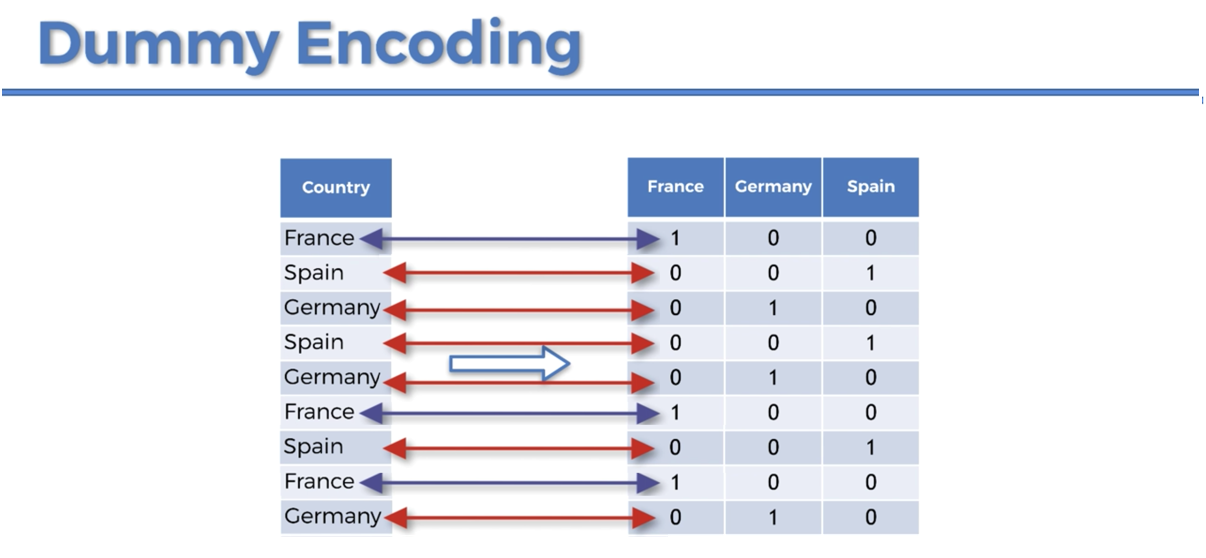

In [4]:
from IPython.display import Image, display
display(Image(filename='course_1.png', width="50%", embed=True))

Original independent variable Shape

In [15]:
print( X.shape )

(10, 3)


OneHotEncoder

In [16]:
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [17]:
print( X.shape )

(10, 5)


> [Note] <br> 
> 1. `categorical_features = [0]` 表示針對這筆資料的第一行去做 OneHotEncoder ，所以下面的程式碼就不需指定要針對哪一行處理
> 2. 因為 3 個類別，總共會用 3 個變數表示，所以維度就增加了

# Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

> [Note] <br>
> 1. 舊版 <br>
```from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```
> 2. `test_size = 0.2` test 資料集要切多少，大多切 0.2、0.25、0.3
> 3. `random_state = 0` 設定random seed 讓每次切分出來的結果相同

# Feature Scaling

<img src='course_2.png', width=50%>

> [Note] <br>
> 1. 大多數的 machine learning 方法都是基於歐幾里德距離，若變數間 Scale 不同的話就會造成很大的影響； <br>
> e.g. Salary_A:$79000$，Salary_B:$48000$；Salary_distance:$(79000-48000)^2=961000000$ <br>
> e.g. Age_A:$48$，Age_B:$27$；Age_distance:$(48-27)^2=441$

|<h4>Standardisation</h4>|<h4>Normalisation</h4>|
|---|---|
|$X_{Std} = \frac{X - mean(X)}{std(X)}$|$X_{norm} = \frac{X - min(X)}{max(X) - min(X)}$|

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

> [Note] <br>
> 1. 已經轉化成 One-Hot Encoding 的變數需要做 Scaling 嗎？ <br>
>   (1) 可以做 Scaling ，這樣可以讓 Model 配適的更好，因為大家的 Scale 相同 <br>
>   (2) 不做 Scaling ，因為這樣可以保留原本變數中想表達的意義，且才可以解釋 <br>
> 2. Dependent Variable 需要做 Scaling 嗎？這裡因為 Dependent Variable 是類別所以不需做， Model會已經知道他是類別的 <br>
> 3. 不是基於歐幾里德距離的 Model 有需要做 Scaling 嗎？
> e.g. Decision Trees 若做了 Scaling 則可以讓他收斂的更快

# How to Set Up Working Directory

In Spyder there are a few way to set a working directory. 
1. use a small folder icon in upper right corner of Spyder interface to navigate to your chosen directory.
2. click on a long box in the top right part of Spyder where you see your directory path and navigate to your chosen directory.
3. select the folder in the File Explorer then select 'Reset kernel' for the console by selecting the little gear icon on the right side of the console pane. By default the console pane it is in the right lower corner. 
4. You can use online commands. To see your current working directory run 
```
import os
os.getcwd()
```
To change it use the following format with your path to the directory. To know what is correct format for your computer paths look at the result of the previous command.

檢查目前所在目錄

In [20]:
import os
os.getcwd()

'/Users/sun/Desktop/Data_Preprocessing'

# My Note

Python format

In [22]:
import math
print('小數點後五位.5f: {:.5f}'.format(math.pi))
print('共五個數字.5g: {:.5g}'.format(math.pi))

小數點後五位.5f: 3.14159
共五個數字.5g: 3.1416
